<a href="https://colab.research.google.com/github/koichi-inoue/JupyterNotebook/blob/master/Sample01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データの読み込み

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#pandasをインポート
import pandas as pd

# DataSample.xlsx の読み込み
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/DataSample.xlsx')

df

,ID,Gender,GPA,Attendance,Japanese,English,Mathematics,Prefecture
0,1,M,1.355,0.58,64.0,7.0,35.0,長崎県
1,2,F,1.847,0.65,NaN,NaN,NaN,福岡県
2,3,M,3.261,0.96,62.0,63.0,30.0,福岡県
3,4,M,2.320,0.93,58.0,56.0,45.0,福岡県
4,5,F,0.000,0.30,70.0,26.0,40.0,福岡県
...,...,...,...,...,...,...,...,...
516,517,M,2.419,0.83,70.0,85.0,NaN,熊本県
517,518,M,1.716,0.84,62.0,12.0,NaN,福岡県
518,519,M,1.629,0.88,42.0,16.0,NaN,福岡県
519,520,M,1.490,0.78,56.0,NaN,NaN,福岡県


# データの基本情報
*   count：データ件数
*   mean：平均
*   std：標準偏差
*   min：最小値
*   max：最大値



In [3]:
# データフレームの基本情報
print('行数・列数：', df.shape)
print('項目名：', df.columns)
print('各列のデータ型：\n', df.dtypes)

行数・列数： (521, 8)
項目名： Index(['ID', 'Gender', 'GPA', 'Attendance', 'Japanese', 'English',
       'Mathematics', 'Prefecture'],
      dtype='object')
各列のデータ型：
 ID               int64
Gender          object
GPA            float64
Attendance     float64
Japanese       float64
English        float64
Mathematics    float64
Prefecture      object
dtype: object


In [5]:
# ID のデータ型を数値から文字列に変換
df['ID'] =  df['ID'].astype(str)

In [6]:
# 要約統計量を表示
df.describe()

,GPA,Attendance,Japanese,English,Mathematics
count,521.000000,521.000000,495.000000,493.000000,217.000000
mean,1.977735,0.805451,55.557576,38.880325,39.451613
std,0.766971,0.129656,13.800495,25.320544,21.797866
min,0.000000,0.200000,19.000000,0.000000,0.000000
25%,1.400000,0.730000,46.000000,19.000000,20.000000
50%,1.909000,0.830000,56.000000,37.000000,40.000000
75%,2.471000,0.900000,66.000000,57.000000,55.000000
max,3.786000,0.990000,88.000000,98.000000,100.000000


In [7]:
# 欠損値の確認
df.isnull().sum()


ID               0
Gender           0
GPA              0
Attendance       0
Japanese        26
English         28
Mathematics    304
Prefecture       0
dtype: int64

In [8]:
# 欠損値を含む行を削除
df = df.dropna(how='any')
# 状態の確認
print(df.shape)
df.isnull().sum()

(216, 8)


ID             0
Gender         0
GPA            0
Attendance     0
Japanese       0
English        0
Mathematics    0
Prefecture     0
dtype: int64

# データの視覚化


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb81964c160>,
      dtype=object)

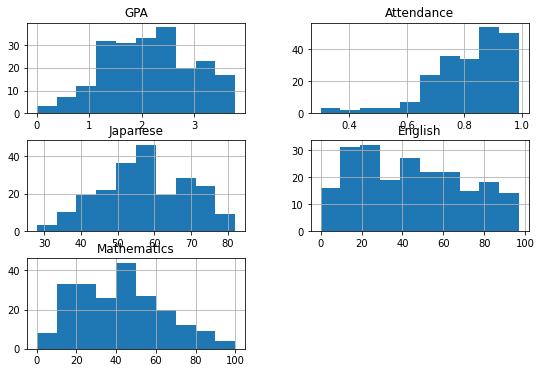

In [9]:
# ヒストグラムの表示
df.hist( figsize=(9, 6) )

In [15]:
# 相関係数を表示
print(df.corr())


                  GPA  Attendance  Japanese   English  Mathematics
GPA          1.000000    0.761032  0.239548  0.472655     0.309402
Attendance   0.761032    1.000000 -0.022475  0.159457     0.143857
Japanese     0.239548   -0.022475  1.000000  0.547091     0.397572
English      0.472655    0.159457  0.547091  1.000000     0.479791
Mathematics  0.309402    0.143857  0.397572  0.479791     1.000000


* 出席率とGPAには、高い相関（0.761）があることがわかります。
* 国語・英語・数学のうち、GPAと最も相関が高いのが「英語（0.473）」です。


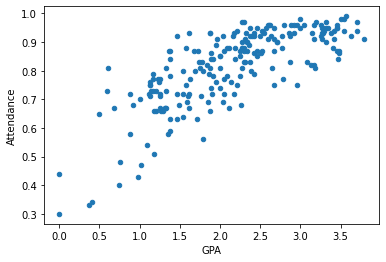

In [14]:
# GPA と Attendance の散布図
df.plot.scatter(x='GPA', y='Attendance')